<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/PCA_C1M4_answered_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Lab: Applications of Principal Component Analysis (PCA)
Estimated time needed: **30** minutes
    

## Objectives

After completing this lab, you will be able to:

* Use Principal Component Analysis (PCA) to project 2-D data onto its principal axes
* Use PCA for feature space dimensionality reduction
* Relate explained variance to feature importance and noise reduction



## Introduction

In this lab you will explore how to implement two important applications of PCA.

1. The first application illustrates how you can use PCA to project 2-D data onto its principal axes, meaning the two orthogonal directions that explain most of the variance in your data.

2. For the second application, you will use PCA to project higher dimensional data down to a lower dimensional feature space. This is an example of dimension reduction, a powerful technique that has multiple benefits, including reducing your model-building computational load and, in many cases, the accuracy of your model. PCA can help you filter out redundant, linearly correlated variables and reduce the amount of noise in your data.


# Part I: Using PCA to project 2-D data onto its principal axes
Here, you will illustrate how you can use PCA to transform your 2-D data to represent it in terms of its principal axes - the projection of your data onto the two orthogonal directions that explain most of the variance in your data. Let's see what all of this means.


Before you start, execute the cell below to make sure that the relevant libraries are available for use.


In [1]:
!pip install numpy==2.2.0
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 95.0 MB/s eta 0:00:00
 

In [4]:
!pip install numpy==1.23.5 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 95.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you h

In [ ]:
# 🔧 Fix broken NumPy version by downgrading to a compatible release
!pip install numpy==1.23.5 --force-reinstall --quiet
import os
os.kill(os.getpid(), 9)  # 🔁 Restart the runtime after install


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0,

### Load libraries
Let's begin by importing the needed libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

### Create dataset
Next you'll create a 2-dimensional dataset containing two linearly correlated features.

You'll use a bivariate normal distribution.

Both features, X1 and X2, will have zero mean and a covariance given by the (symmetric) covariance matrix:

\begin{equation}
\begin{pmatrix}
  3  & 2     \\\\\\\\
  2  & 2     \\
\end{pmatrix}
\end{equation}

Here, the diagonal elements define the variances of X1 and X2 (3 and 2, respectively), while the off-diagonal element is the covariance (2) between X1 and X2, which expresses how similarly these features vary.


In [2]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

### Exercise 1. Visualize the relationship between the two features.
For example, you can use a scatterplot.


# enter your code here

# Scatter plot of the two features
plt.figure()
plt.scatter(..., ..., edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

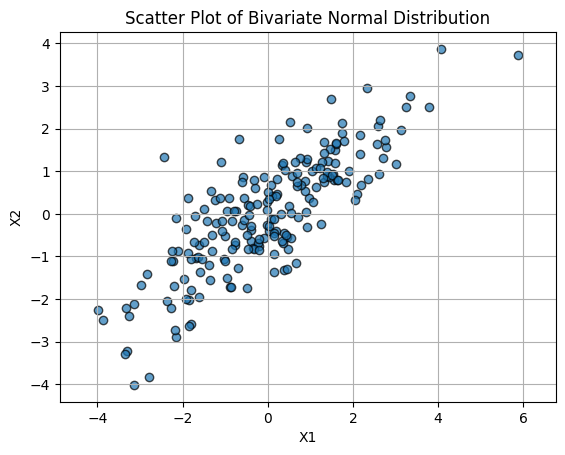

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic bivariate normal data
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]  # covariance matrix
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

# Scatter plot of the two features
plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()



<details><summary>Click here for the solution</summary>

```python
# Scatter plot of the two features
plt.figure()
plt.scatter(X[:, 0], X[:, 1],  edgecolor='k', alpha=0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()
```

</details>


Consider the main direction the data follows in the scatterplot. It's actually the direction of the first principal component.
You can use PCA to determine this direction.

###  Perform PCA on the dataset
Next, you'll initialize a 2-component PCA model with default parameters and then fit and transform the feature space in one step.


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Get the principal components from the model.
The principal components are the principal axes, represented in feature space coordinates,
which align with the directions of maximum variance in your data.


In [6]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

The principal components are sorted in decreasing order by their explained variance, which can be expressed as a ratio:


In [7]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

### Exercise 2. What percentage of the variance in the data is explained by the first principal component?


In [8]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Show explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print(f"Percentage explained by the 1st component: {explained_variance[0] * 100:.2f}%")


Explained variance ratio: [0.9111946 0.0888054]
Percentage explained by the 1st component: 91.12%


Enter your answer here


<details><summary>Click here for the solution</summary>
You can see that the first component explains over 90% of the variance in the data, while the second explains about 9%.
</details>


### Display the results
Here, you'll use a scatterplot to display the data points in their original feature space, X1, X2.

You'll also plot the projections of the data points onto their principal component directions.

It's a bit technical, requiring some understanding of linear algebra, but the outcome will be instructive.

Let's see how this works.

#### Project the data onto its principal component axes
The projection of the data onto a given principal component yields the coordinates of each of the data points along that component's direction.

The new coordinates are given by the dot products of each point's coordinates with the given PCA component.

Specifically, the projections are given by:


In [9]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

Now that you have these coordinates, you can use them to represent the projections of each data point along the principal directions in the original feature space.

In code:


In [10]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

#### Plot the results
Now let's visualize this.


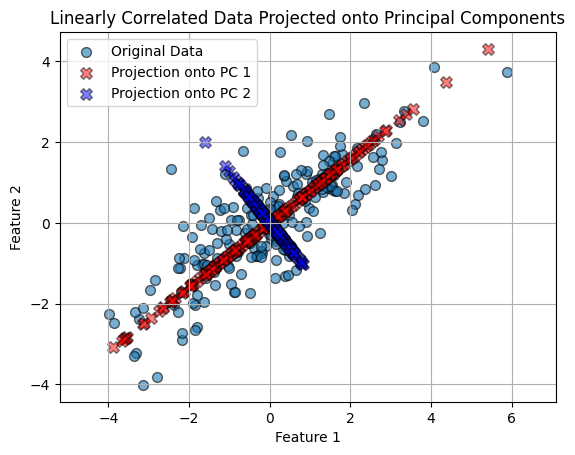

In [11]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

It took some effort but now you can see what the the principal coordinates mean.

The data varies in two main directions.
- The first direction, in red, is aligned in the direction having the widest variation.

### Exercise 3. Describe the second direction.


In [12]:
# Get principal components
components = pca.components_

# Project X onto PC1 and PC2
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

# Get coordinates along each PC axis
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]


Enter your answer here


<details><summary>Click here for the solution</summary>
The second direction, in blue, is perpendicular to first and has a lower variance.
</details>


# Part II. PCA for feature space dimensionality reduction
For this second application, you'll use PCA to project the four-dimensional Iris feature data set down onto a two-dimensional feature space.

This will have the added benefit of enabling you to visualize some of the most important structures in the dataset.


### Load and preprocess Iris data
Let's start by loading the iris data and standardizing is features.


In [13]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Exercise 4. What are the Iris flower's names?


In [14]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Enter your code here

<details><summary>Click here for the solution</summary>

```python

iris.target_names

```

</details>


### Exercise 5. Initialize a PCA model and reduce the Iris data set dimensionality to two components


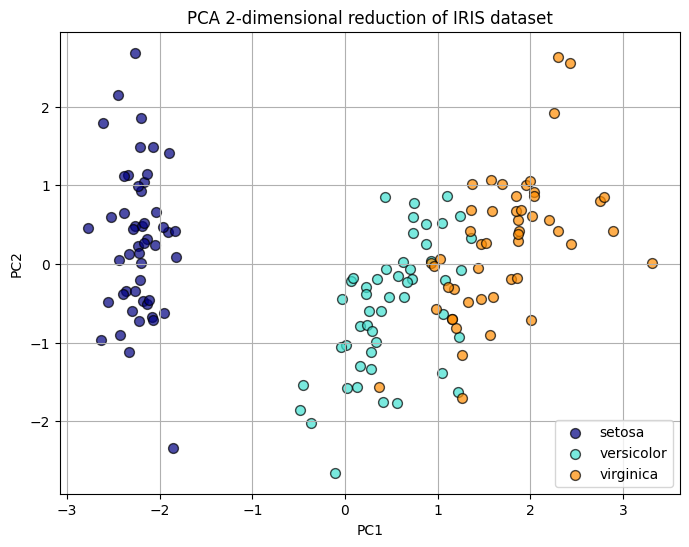

In [15]:
from sklearn.decomposition import PCA

# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, edgecolor='k', alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.grid(True)
plt.show()


# Enter your code here
# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca. ...

<details><summary>Click here for the solution</summary>

```python

# Apply PCA and reduce the dataset to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

```

</details>


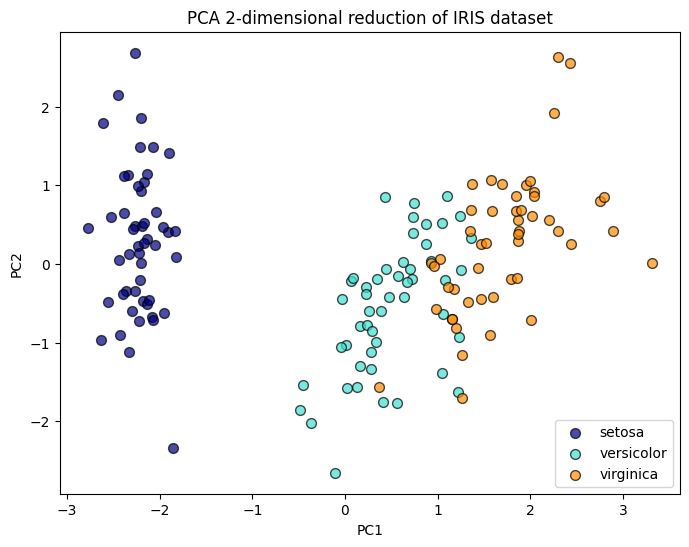

In [16]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

## Reflection
Examine the plot and consider how well the Iris classes have been separated simply by projecting the feature space down to two principal components.


### Exercise 6. What percentage of the original feature space variance do these two combined principal components explain?


Total variance explained by first two components: 0.9581


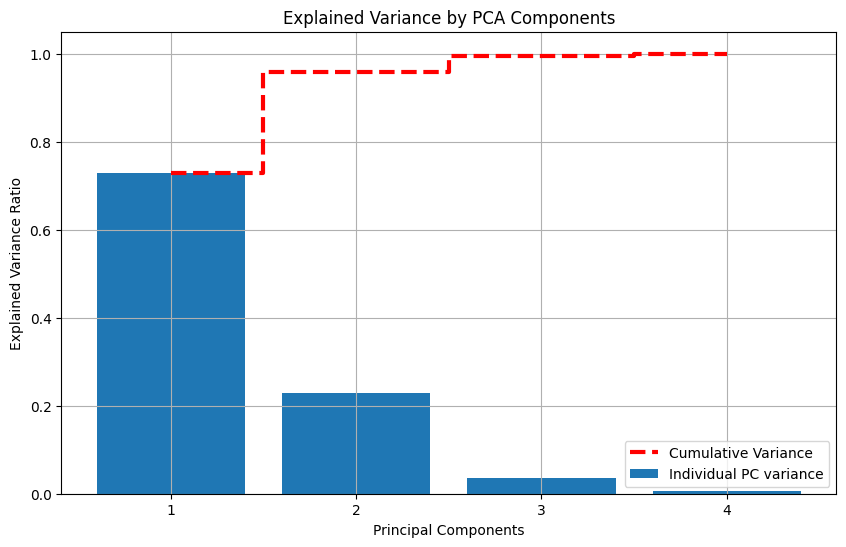

In [17]:
# Standardize again (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Total variance explained by first two components: {explained_variance_ratio[:2].sum():.4f}")

# Plot explained and cumulative variance
plt.figure(figsize=(10,6))
plt.bar(range(1, 5), explained_variance_ratio, alpha=1, align='center', label='Individual PC variance')
plt.step(range(1, 5), np.cumsum(explained_variance_ratio), where='mid', linestyle='--', lw=3, color='red', label='Cumulative Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.xticks([1, 2, 3, 4])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Enter your code here

# hint - add the individual values

<details><summary>Click here for the solution</summary>

```python

100*pca.explained_variance_ratio_.sum()
```

</details>


## A deeper look at the explained variances
In this next and final set of exercises, your goal is to:
- Acquire and plot the PCA-explained variance ratios for all four Iris features as a barplot
- Overlay the cummulative explained variance

### Exercise 7. Reinitialize the PCA model without reducing the dimension
Standardize the Iris data, and fit and transform the scaled data.


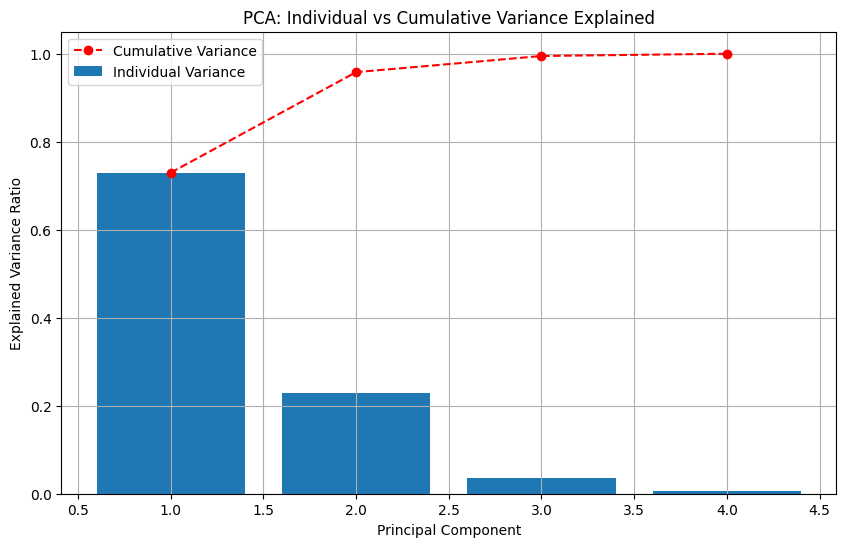

In [18]:
# Re-run PCA without limiting components
pca_full = PCA()  # n_components not specified
pca_full.fit(X_scaled)

# Explained variance ratios
explained = pca_full.explained_variance_ratio_
cumulative = np.cumsum(explained)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained) + 1), explained, label="Individual Variance")
plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o', linestyle='--', color='red', label="Cumulative Variance")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA: Individual vs Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Enter your code here

# Standardize the data
scaler = ... ()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = ...
X_pca = pca. ...

<details><summary>Click here for the solution</summary>

```python

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
```

</details>


Here are some considerations:
- What does the red dashed line indicate to you?
- What would you consider doing if your wanted to suppress some noise in your data?


### Congratulations! You're ready to move on to your next lesson!


## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>


### Other Contributors

<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abhishek Gagneja</a>


<!-- ## Changelog

| Date | Version | Changed by | Change Description |
|:------------|:------|:------------------|:---------------------------------------|
| 2024-11-05 | 1.0  | Jeff Grossman    | Create content  | -->



## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
